## Important Necessary Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

## Data Loading

In [21]:
df=pd.read_csv("data.csv") ## Titanic Dataset

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [25]:
df=df.drop(["Cabin"],axis=1)

In [26]:
df.shape

(891, 11)

In [27]:
for i in df.columns:
    print(i,df[i].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 3


In [28]:
cont_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
id_cols=["PassengerId","Name","Ticket"]
len(cont_cols)+len(cat_cols)+len(id_cols)

11

In [29]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

<AxesSubplot:xlabel='Age'>

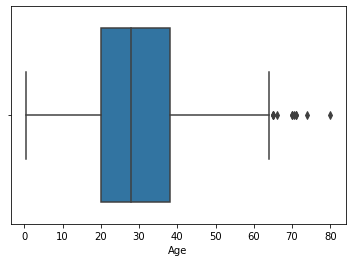

In [30]:
sns.boxplot(df["Age"])

In [31]:
median=df["Age"].median()
df["Age"].fillna(median,inplace=True)

In [32]:
100*df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [33]:
mode=df["Embarked"].mode()[0]
df["Embarked"].fillna(mode,inplace=True)

In [34]:
100*df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Age


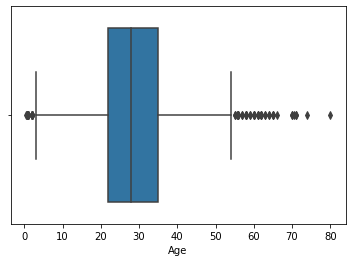

Fare


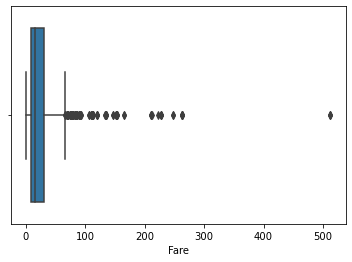

In [36]:
for i in cont_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [37]:
df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
q1=22
q3=35
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df["Age"]=np.where(df["Age"]>upper_bound,upper_bound,df["Age"])#Capping
df["Age"]=np.where(df["Age"]<lower_bound,lower_bound,df["Age"])#Flooring

In [40]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
q1=7.910400
q3=31.000000
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df["Fare"]=np.where(df["Fare"]>upper_bound,upper_bound,df["Fare"])
df["Fare"]=np.where(df["Fare"]<lower_bound,lower_bound,df["Fare"])

## EDA

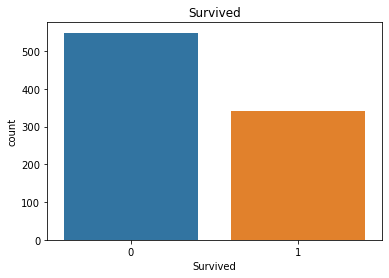

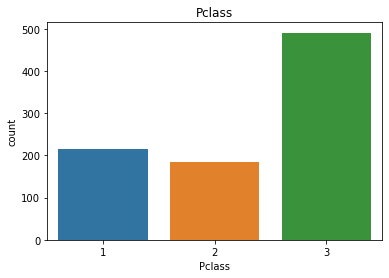

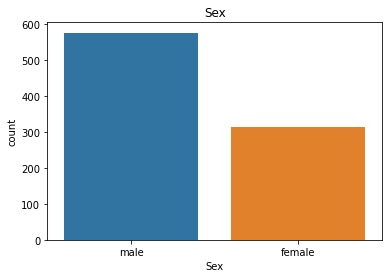

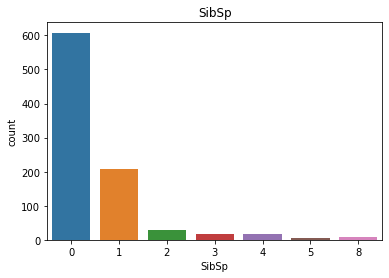

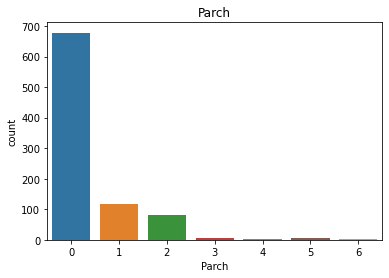

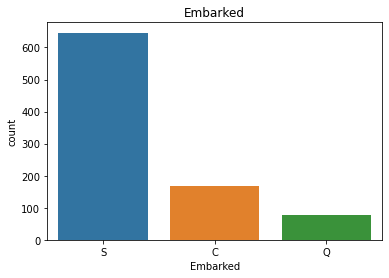

In [43]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

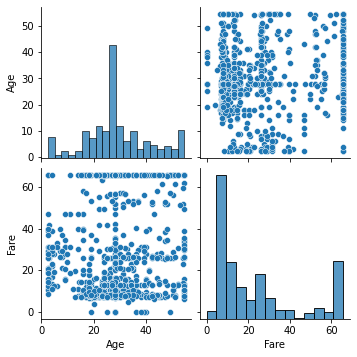

In [44]:
sns.pairplot(df[cont_cols])

In [45]:
df.drop(id_cols,axis=1,inplace=True)

<AxesSubplot:>

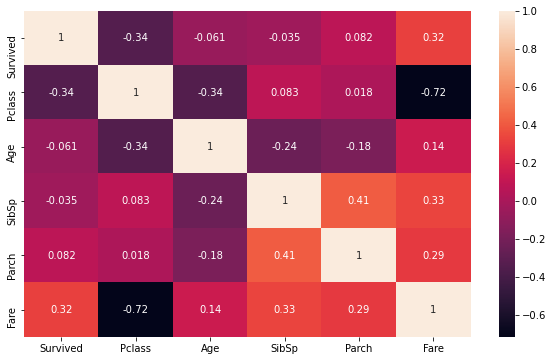

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## Additional Preprocessing

In [50]:
df["Sex"]=df["Sex"].map({"male":0,"female":1})

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,65.6344,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


## Dummy Creation

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [64]:
df["Pclass"]=df["Pclass"].astype('object')
df["SibSp"]=df["SibSp"].astype('object')
df["Parch"]=df["Parch"].astype('object')

In [65]:
cols=["Pclass","SibSp","Parch","Embarked"]
dum=pd.get_dummies(df[cols],drop_first=True)
df1=pd.concat([df,dum],axis=1)

In [66]:
dum

,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df1=df1.drop(cols,axis=1)

In [68]:
df1.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,0,22.0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,65.6344,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,35.0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [69]:
df1.shape

(891, 20)

## Train - Test Split

In [220]:
X=df1.drop(["Survived"],axis=1)
Y=df1[["Survived"]]

## Scaling

In [221]:
X=(X-X.mean())/X.std()

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [223]:
print("X_train Shape:",X_train.shape)
print("Y_train Shape:",y_train.shape)
print("X_test Shape:",X_test.shape)
print("Y_test Shape:",y_test.shape)

X_train Shape: (712, 19)
Y_train Shape: (712, 1)
X_test Shape: (179, 19)
Y_test Shape: (179, 1)


## Feature Selection

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=10)

In [225]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 408 to 520
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [226]:
selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False])

In [227]:
cols_to_keep=list(X_train.columns[selector.support_])

In [228]:
X_train=X_train[cols_to_keep]
X_test=X_test[cols_to_keep]

In [229]:
X_train.shape,X_test.shape

((712, 10), (179, 10))

## First Model

In [249]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test,has_constant='add')
print(X_train_sm.shape,X_test_sm.shape)
model1=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result1=model1.fit()
result1.summary()

(712, 11) (179, 11)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      701
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -306.59
Date:                Sun, 12 Jun 2022   Deviance:                       613.18
Time:                        21:59:52   Pearson chi2:                     716.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1612    401.902     -0.003      0.998    -788.875     786.552
Sex            1.2719      0.104     12.192      0.000       1.067       1.476
Age           -0.4138      0.111     -3.739      0.000      -0.631      -0.197
Fare           0.4834      0.127      3.798      0.000       0.234       0.733
Pclass_3      -0.5767      0.130     -4.427      0.000      -0.832      -0.321
SibSp_3       -0.2385      0.098     -2.431      0.015      -0.431      -0.046
SibSp_4       -0.2559      0.109     -2.355      0.019      -0.469      -0.043
SibSp_5       -1.7708   2369.473     -0.001      0.999   -4645.852    4642.310
SibSp_8       -2.1605   2659.180     -0.001      0.999   -5214.058    5209.737
Parch_4       -1.5533   2339.783     -0.001      0.999   -4587.443    4584.337
Parch_5       -1.7471   2956.883     -0.001      1.000   -5797.130    5793.636
==============================================================================
"""

In [255]:
X_train_sm=X_train_sm.drop(["SibSp_5"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      702
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.77
Date:                Sun, 12 Jun 2022   Deviance:                       619.54
Time:                        22:01:22   Pearson chi2:                     720.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0337    218.145     -0.005      0.996    -428.590     426.523
Sex            1.2738      0.104     12.264      0.000       1.070       1.477
Age           -0.3833      0.109     -3.532      0.000      -0.596      -0.171
Fare           0.4281      0.124      3.462      0.001       0.186       0.670
Pclass_3      -0.6208      0.129     -4.819      0.000      -0.873      -0.368
SibSp_3       -0.2270      0.098     -2.318      0.020      -0.419      -0.035
SibSp_4       -0.2365      0.108     -2.188      0.029      -0.448      -0.025
SibSp_8       -2.0557   1609.464     -0.001      0.999   -3156.547    3152.435
Parch_4       -1.4830   1417.133     -0.001      0.999   -2779.013    2776.047
Parch_5       -1.6676   1789.525     -0.001      0.999   -3509.071    3505.736
==============================================================================
"""

In [256]:
X_train_sm=X_train_sm.drop(["SibSp_8"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -314.93
Date:                Sun, 12 Jun 2022   Deviance:                       629.87
Time:                        22:01:44   Pearson chi2:                     725.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8825    164.597     -0.005      0.996    -323.486     321.721
Sex            1.2541      0.103     12.199      0.000       1.053       1.456
Age           -0.3854      0.108     -3.576      0.000      -0.597      -0.174
Fare           0.3252      0.118      2.766      0.006       0.095       0.556
Pclass_3      -0.7029      0.126     -5.579      0.000      -0.950      -0.456
SibSp_3       -0.2106      0.098     -2.159      0.031      -0.402      -0.019
SibSp_4       -0.2149      0.108     -1.999      0.046      -0.426      -0.004
Parch_4       -1.4735   1415.385     -0.001      0.999   -2775.578    2772.631
Parch_5       -1.6549   1790.322     -0.001      0.999   -3510.622    3507.312
==============================================================================
"""

In [257]:
X_train_sm=X_train_sm.drop(["Parch_4"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      704
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -316.94
Date:                Sun, 12 Jun 2022   Deviance:                       633.89
Time:                        22:02:00   Pearson chi2:                     732.
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7937     81.591     -0.010      0.992    -160.710     159.123
Sex            1.2463      0.102     12.175      0.000       1.046       1.447
Age           -0.4024      0.107     -3.753      0.000      -0.612      -0.192
Fare           0.3125      0.117      2.672      0.008       0.083       0.542
Pclass_3      -0.7234      0.126     -5.764      0.000      -0.969      -0.477
SibSp_3       -0.2078      0.098     -2.130      0.033      -0.399      -0.017
SibSp_4       -0.2127      0.107     -1.981      0.048      -0.423      -0.002
Parch_5       -1.5756   1086.726     -0.001      0.999   -2131.520    2128.369
==============================================================================
"""

In [258]:
X_train_sm=X_train_sm.drop(["Parch_5"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model5=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -318.57
Date:                Sun, 12 Jun 2022   Deviance:                       637.15
Time:                        22:02:26   Pearson chi2:                     738.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6883      0.101     -6.784      0.000      -0.887      -0.489
Sex            1.2374      0.102     12.128      0.000       1.037       1.437
Age           -0.4158      0.107     -3.886      0.000      -0.625      -0.206
Fare           0.3015      0.117      2.588      0.010       0.073       0.530
Pclass_3      -0.7438      0.125     -5.955      0.000      -0.989      -0.499
SibSp_3       -0.2051      0.098     -2.101      0.036      -0.396      -0.014
SibSp_4       -0.2101      0.107     -1.959      0.050      -0.420       0.000
==============================================================================
"""

In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.001624
1,Sex,1.071839
2,Age,1.185412
3,Fare,1.583268
4,Pclass_3,1.627134
5,SibSp_3,1.033998
6,SibSp_4,1.108642


## Evaluation (Completely different from Linear Regression)

In [261]:
# Getting the predicted values on the train set
y_train_pred = result5.predict(X_train_sm)
y_train_pred[:10]

408    0.101893
480    0.233784
510    0.079274
609    0.891335
547    0.302968
709    0.090507
152    0.034688
493    0.227740
392    0.082018
823    0.568297
dtype: float64

In [262]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10189281, 0.23378382, 0.0792739 , 0.89133525, 0.30296753,
       0.09050735, 0.03468827, 0.22773978, 0.08201811, 0.56829696])

In [263]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.Survived, 'Survived_probability':y_train_pred})
#y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_probability
408,0,0.101893
480,0,0.233784
510,1,0.079274
609,1,0.891335
547,1,0.302968


In [266]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_probability.map(lambda x: 1 if x > 0.54 else 0)
y_train_pred_final

,Survived,Survived_probability,predicted
408,0,0.101893,0
480,0,0.233784,0
510,1,0.079274,0
609,1,0.891335,1
547,1,0.302968,0
...,...,...,...
855,1,0.631546,1
871,1,0.841682,1
835,1,0.894626,1
792,0,0.735579,1


In [267]:
from sklearn import metrics
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[397  48]
 [ 84 183]]


In [268]:
(397+183)/(397+183+48+84)

0.8146067415730337